In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage
from scipy import signal

from skimage import io

##############################################

import mrlab as mr

##############################################"

############## le close('all') de Matlab
plt.close('all')

In [8]:
alpha=0.3
seuilnorme=5
ima=io.imread('images/pyra-gauss.tif')



gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  

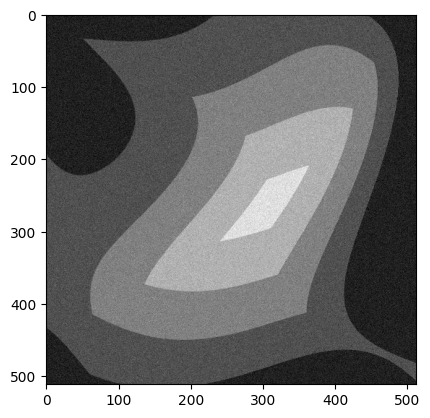

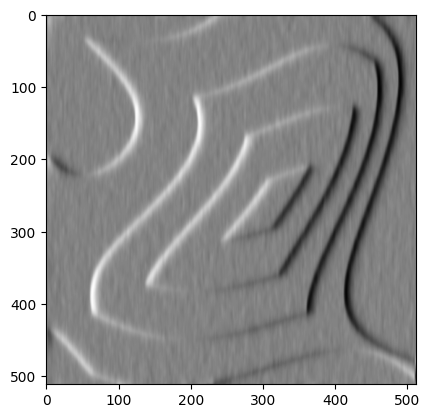

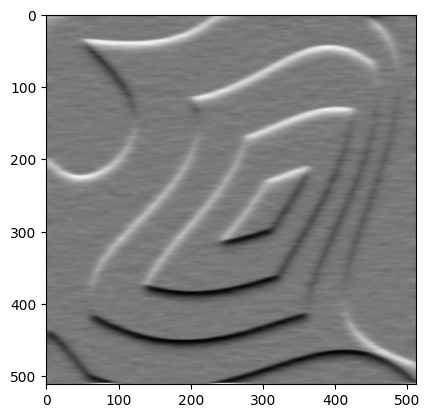

In [9]:
plt.figure('Image originale')
plt.imshow(ima, cmap='gray')

plt.figure('Gradient horizontal')
plt.imshow(gradx, cmap='gray')

plt.figure('Gradient vertical')
plt.imshow(grady, cmap='gray')

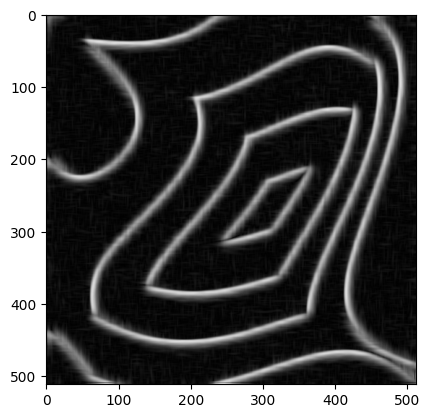

In [10]:
norme=np.sqrt(gradx*gradx+grady*grady)

plt.figure('Norme du gradient')
plt.imshow(norme, cmap='gray')

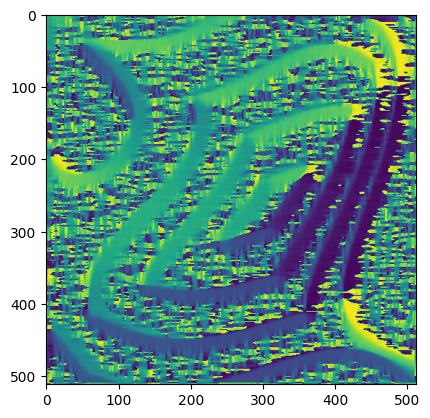

In [11]:
nl,nc=gradx.shape
direction=np.arctan2(np.ravel(grady),np.ravel(gradx));

direction=np.reshape(direction,(nl, -1))
direction=255*direction/2/math.pi;

plt.figure('Direction du gradient')
plt.imshow(direction)

1


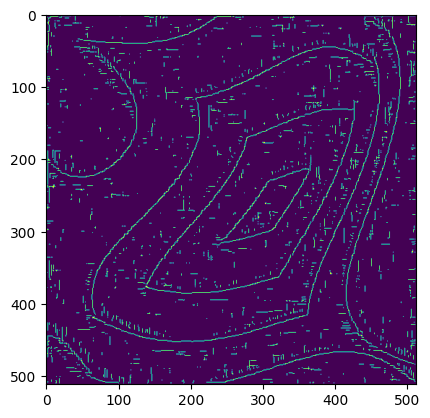

In [12]:
io.imsave('direction.tif',np.uint8(direction))

contours=np.uint8(mr.maximaDirectionGradient(gradx,grady))

plt.figure('Contours')
plt.imshow(255*contours)


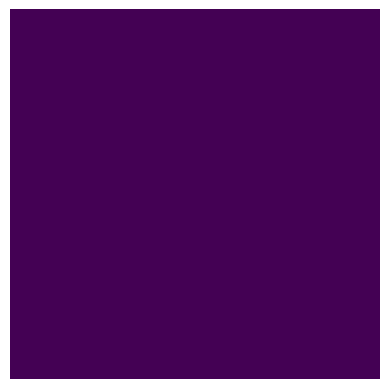

In [13]:
valcontours=(norme>seuilnorme)*contours
      
plt.figure('Contours normés')
plt.axis("off")
plt.imshow(255*valcontours)